# Tarea Visualización Avanzada

Para la realización de esta tarea se ha utilizado el dataset *"Spotify Dataset 1921-2020, 600k+ Tracks"* de Kaggle.

Para acceder a la web será desde [aquí](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/code).

## Objetivo

El objetivo de este trabajo es explicar los datos de Spotify en términos de popularidad de las canciones, géneros, artistas más populares, y otros aspectos de la aplicación a través de diversos gráficos que detallen los datos.

## Ficheros

- artists.csv: contiene métricas de popularidad de cada artista.
- tracks.csv: contiene los detalles de cada canción.
- dict_artists.csv (creado): contiene un listado de artistas recomendados para fans de cada artista, ordenados de mejor a peor. Originalmente estaba en formato JSON y no tenía la columna de orden.
- dict_track_artist.csv (creado): contiene un listado de canciones y el artista que la creó. Pueden ser varios artistas para cada canción. 

## Comentarios

Se han excluido las canciones anteriores a 1980 de modo que se reduzcan los tamaños de los ficheros de forma considerable. 
También se ha excluído el año 2021, esto es debido a que la muestra no contiene todos los datos de este año y se excluye para tener años completos.
Además, se han eliminado los artistas sin canciones.

In [2]:
# !pip install kagglehub pandas numpy matplotlib seaborn plotly

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import ast
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [4]:
# Descarga de los datos

# if not os.path.exists("./data/"):
#     os.makedirs("./data", exist_ok=True)
# if not (os.path.exists("./data/artists.csv") and os.path.exists("./data/tracks.csv") and os.path.exists("./data/dict_artists.json")):
#     path = kagglehub.dataset_download("yamaerenay/spotify-dataset-19212020-600k-tracks")
#     shutil.move(path, "./data/", copy_function=shutil.copy)
#     for file in os.listdir("./data/1"):
#         shutil.move(os.path.join("./data/1", file), "./data/")
#     shutil.rmtree(path)

In [5]:
artists_df = pd.read_csv("./data/artists.csv", encoding="utf-8")
tracks_df = pd.read_csv("./data/tracks.csv", encoding="utf-8")
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
dict_artists_df = pd.read_csv("./data/dict_artists.csv", encoding="utf-8")
dict_track_artist_df = pd.read_csv("./data/dict_track_artist.csv", encoding="utf-8")

In [6]:
# Creación del diccionario de artistas y sus artistas recomendados
# with open('./data/dict_artists.json', 'r', encoding='utf-8') as f:
#     data = json.load(f)
# dict_df = pd.DataFrame(list(data.items()), columns=['artist', 'recommended_artists']).explode('recommended_artists')
# dict_df['order'] = dict_df.groupby('artist').cumcount() + 1 # Añade la columna de orden
# dict_df.to_csv("./data/dict_artists.csv", index=False, encoding="utf-8")

In [7]:
# Creación del diccionario de canciones y sus artistas
# dict_track_artist = tracks_df[['id', 'id_artists', 'artists']]
# for col in ['id_artists', 'artists']:
#     dict_track_artist[col] = dict_track_artist[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# dict_track_artist = dict_track_artist.explode(['id_artists', 'artists']).reset_index(drop=True)
# dict_track_artist = dict_track_artist.rename(columns={
#     'id_artists': 'id_artist',
#     'artists': 'artist'
# })
# dict_track_artist.to_csv("./data/dict_track_artist.csv", index=False, encoding="utf-8")

In [8]:
# ver de tracks_df las filas cuya release_date tenga una longitud de 4 caracteres
# tracks_df[tracks_df['release_date'].str.len() == 4]
# # añadir a estos casos un "-01-01" al final de la fecha
# tracks_df.loc[tracks_df['release_date'].str.len() == 4, 'release_date'] += '-01-01'
# # convertir la columna release_date a datetime
# tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], errors='coerce')

In [9]:
# Función para obtener el número de canciones que superan un umbral de probabilidad para un listado de años
def umbral_popularidad(anos: list, umbral: int):
    dict_r = dict()
    for ano in anos:
        dict_r.update(
            {ano :
            int(tracks_df[tracks_df['release_date'] == ano][tracks_df['popularity'] >= umbral]['id'].count())}
        )
    return dict_r

In [10]:
# Cantidad de canciones por año de lanzamiento
# Además, se muestra por colores la distribución por popularidad
anos = tracks_df['release_date'].sort_values(ascending=True).unique()

total = umbral_popularidad(anos, 0)
cuart_1 = umbral_popularidad(anos, 25)
cuart_2 = umbral_popularidad(anos, 50)
cuart_3 = umbral_popularidad(anos, 75)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=tuple(total.keys()), y=tuple(total.values()),
    fill='tozeroy',  # rellena hasta el 0
    mode='none',  # sin lineas ni marcas
    name='Total',
))
fig.add_trace(go.Scatter(
    x=tuple(cuart_1.keys()), y=tuple(cuart_1.values()),
    fill='tozeroy', mode='none', name='Popularidad >= 25',
))
fig.add_trace(go.Scatter(
    x=tuple(cuart_2.keys()), y=tuple(cuart_2.values()),
    fill='tozeroy', mode='none', name='Popularidad >= 50',
))
fig.add_trace(go.Scatter(
    x=tuple(cuart_3.keys()), y=tuple(cuart_3.values()),
    fill='tozeroy', mode='none', name='Popularidad >= 75',
))
fig.update_layout(
    title='Popularidad de las canciones a lo largo de los años (Spotify)',
    xaxis=dict(
        title='Año',
        dtick=1,  # Show every year
        tick0=1980,  # Start ticks from 1998
        tickmode='linear',  # Linear tick mode for even spacing
    ),
    xaxis_title='Año',
    yaxis_title='Numero de canciones',
    hovermode='x unified',  # shows all values for a given x-coordinate
    showlegend=True,
    template='ygridoff'
)

fig.show()

Lo que podemos observar en el gráfico anterior es lo siguiente:
- La base de datos de Spotify contiene contiene muchas canciones producidas anualmente hasta el año 2000, donde cae súbitamente a casi la mitad.
- La popularidad de las canciones sin embargo crece según el cuartil:
    - Por un lado las canciones con >= 25 siguen la tendencia del total.
    - Las canciones con popularidad >= 50 crecen constantemente hasta la decada de 2010, donde comienza a crecer exponencialmente.
    - Las canciones de >= 75 de popularidad se significan en el gráfico ya a partir de 2016.

Estas tendecias se exlpican por el uso de la aplicación. Ésta se lanzó al mercado en 2006 y comenzó a popularizarse en la decada de 2010, aumentando cada vez más el número de usuarios. Es por esto que vemos los niveles más altos de popularidad en fechas más recientes, donde los efectos de la viralidad en redes sociales se dan y la expansión del uso de la aplicación es máximo.


In [11]:
total_canciones = dict(dict_track_artist_df.groupby('id_artist')['id'].count())
artists_df['total_canciones'] = artists_df.id.map(total_canciones)

# Top 10 artistas con más canciones
artists_df.sort_values('total_canciones', ascending=False).head(10)

,id,followers,genres,name,popularity,total_canciones
40351,3meJIgRw7YleJrmbpbJK6S,613060.0,hoerspiel,Die drei ???,90,3456
38227,0i38tQX5j4gZ0KS3eCMoIl,23593.0,kleine hoerspiel,TKKG Retro-Archiv,71,2006
40729,3t2iKODSDyzoDJw7AsD99u,128057.0,hoerspiel,Bibi Blocksberg,82,1441
40766,1l6d0RIxTL3JytlLGvWzYe,79023.0,hoerspiel,Benjamin Blümchen,76,1390
42112,2x8vG4f0HYXzMEo3xNsoiI,125018.0,"hoerspiel, kleine hoerspiel",Bibi und Tina,80,927
41559,2ae6PxICSOZHvjqiCcgon8,1385393.0,filmi,S. P. Balasubrahmanyam,70,873
41818,0SfsnGyD8FpIN4U4WCkBZ5,3799329.0,"dutch trance, edm, pop dance, progressive hous...",Armin van Buuren,79,661
41611,003f4bk13c6Q3gAUXv7dGJ,89280.0,"austrian orchestra, classical, classical perfo...",Wiener Philharmoniker,72,588
37856,7p5EwRiUqxJxnOCcULTHex,6155.0,NaN,Globi,57,563
38489,3gBKY0y3dFFVRqicLnVZYz,2856679.0,"classic bollywood, desi pop, filmi, modern bol...",Alka Yagnik,74,542


In [12]:
# Top 10 artistas más populares
artists_df.sort_values('popularity', ascending=False).head(10)

,id,followers,genres,name,popularity,total_canciones
40664,1uNFoZAHBGtllmzznpCI3s,44606973.0,"canadian pop, pop, post-teen pop",Justin Bieber,100,147
56933,3TVXtAsR1Inumwj472S9r4,54416812.0,"canadian hip hop, canadian pop, hip hop, pop r...",Drake,98,270
33641,06HL4z0CvFAxyc27GXpf02,38869193.0,"pop, post-teen pop",Taylor Swift,98,360
31425,4q3ewBCX7sLwd24euuV69X,32244734.0,"latin, reggaeton, trap latino",Bad Bunny,98,154
31426,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"chicago rap, melodic rap",Juice WRLD,96,73
40666,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"k-pop, k-pop boy group",BTS,96,274
40665,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"canadian contemporary r&b, canadian pop, pop",The Weeknd,96,113
40667,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"pop, post-teen pop",Ariana Grande,95,125
40669,6M2wZ9GZgrQXHCFfjv46we,24123468.0,"dance pop, pop, uk pop",Dua Lipa,95,65
40668,1vyhD5VmyZ7KMfW5gqLgo5,27286822.0,"latin, reggaeton, reggaeton colombiano, trap l...",J Balvin,95,136


In [13]:
dict_track_artist_df

,id,id_artist,artist
0,6catF1lDhNTjjGa2GxRQNN,3UmBeGyNwr4iDWi1vTxWi8,Gerry & The Pacemakers
1,6Pkt6qVikqPBt9bEQy8iTz,6lH5PpuiMa5SpfjoIOlwCS,The Toys
2,4aSw1QJIMwYSoDEgzgdCJL,3UmBeGyNwr4iDWi1vTxWi8,Gerry & The Pacemakers
3,0ZMMtH875IR2TfkyC4PolD,3UmBeGyNwr4iDWi1vTxWi8,Gerry & The Pacemakers
4,1hx7X9cMXHWJjknb9O6Ava,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra
...,...,...,...
490045,1ZwZsVZUiyFwIHMNpI3ERt,4USdOnfLczwUglA3TrdHs2,Emilie Chin
490046,5rgu12WBIHQtvej2MdHSH0,1QLBXKM5GCpyQQSVMNZqrZ,阿YueYue
490047,0NuWgxEp51CutD2pJoF4OM,1dy5WNgIKQU6ezkpZs4y8z,ROLE MODEL
490048,27Y1N4Q4U3EfDU5Ubw8ws2,37M5pPGs6V1fchFJSgCguX,FINNEAS


In [14]:
# Creamos la columna de géneros en el DataFrame de tracks para poder analizar los géneros de las canciones
tracks_genres = dict(
    dict_track_artist_df 
        .merge(artists_df[['id', 'genres']], left_on='id_artist', right_on= 'id', how='left')
        .dropna(subset=['genres'])
        .assign(genres=lambda x: x['genres'].str.split(', '))
        .explode('genres')
        .rename(columns={'id_x': 'id'})
        .drop(columns=['id_y', 'id_artist', 'artist'])
        .drop_duplicates(['id', 'genres'])
        .groupby('id')['genres']
        .apply(lambda x: ', '.join(sorted(x)))
        .reindex(tracks_df['id'])
        .fillna(''))

tracks_df['genres'] = tracks_df['id'].map(tracks_genres)

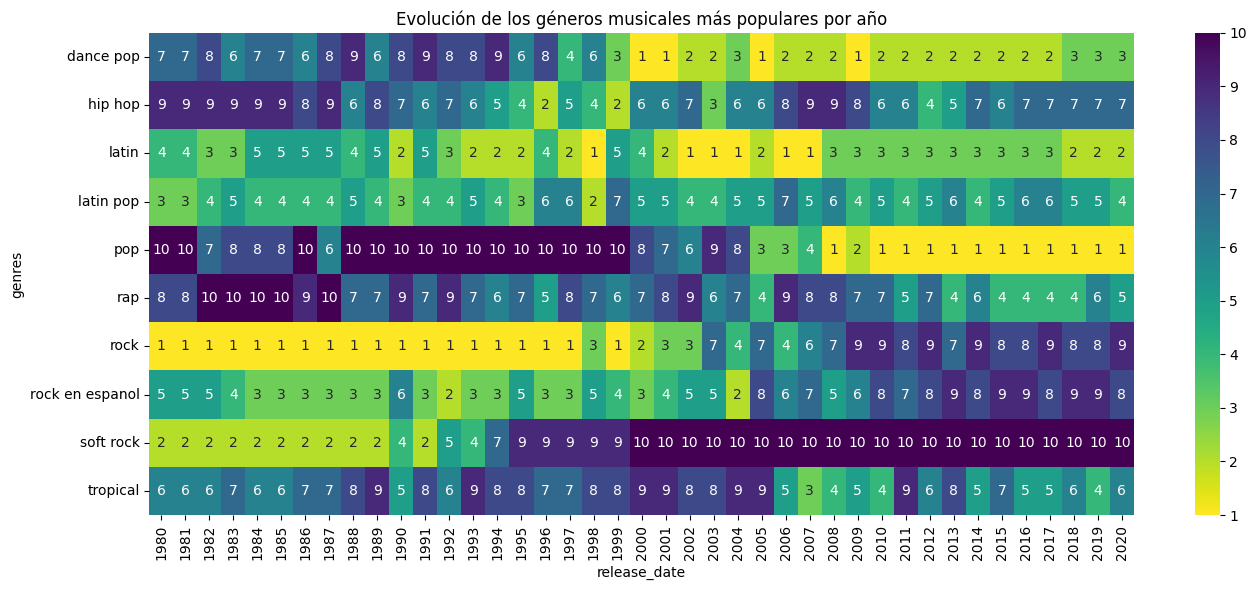

In [75]:
top_generos_ano = (
    tracks_df
        .assign(genres=tracks_df['genres'].str.split(', '))
        .explode('genres')
        .dropna(subset=['genres'])
        .query('genres != ""')
        .groupby(['release_date', 'genres'])['popularity']
        .sum()
        .reset_index(name='popularity_sum')
        .sort_values(['release_date', 'popularity_sum'], ascending=[True, False])
        .groupby('release_date')
        .head(-1)
        .reset_index(drop=True))

top_generos_ano = (
    top_generos_ano[top_generos_ano['genres'].isin(
        list(top_generos_ano
                .groupby('genres')['popularity_sum']
                .sum()
                .sort_values(ascending=False)
                .head(10)
                .index))])

for ano in top_generos_ano['release_date'].unique():
    generos = list(
                top_generos_ano[top_generos_ano['release_date'] == ano]
                    .sort_values('popularity_sum', ascending=True)['genres'])
    for i in range(len(generos)):
        mask = (top_generos_ano['release_date'] == ano) & (top_generos_ano['genres'] == generos[i])
        top_generos_ano.loc[mask, 'popularity_sum'] = len(generos) - i

top_generos_ano.rename(columns={'popularity_sum': 'ranking'}, inplace=True)
top_generos_ano = top_generos_ano.reset_index(drop=True)

plt.figure(figsize=(14, 6))
heatmap_data = top_generos_ano.pivot_table(
    index='genres', columns='release_date', values='ranking', fill_value=0
)

sns.heatmap(heatmap_data, annot=True, cmap='viridis_r')
plt.title('Evolución de los géneros musicales más populares por año')
plt.tight_layout()
plt.show()

El anterior gráfico muestra como los 10 géneros musicales más populares de todo nuestro set de datos han evolucionado en la clasificación de género más popular por año.

Para esto, hemos cogido los 10 géneros que suman mayor puntuación global de popularidad, y hemos gráficado que puesto obtiene cada año.

Esto nos muestra como han cambiado las tendencias musicales a lo largo de las décadas:
- En los 80 reinaban los distintos géneros de rock mientras pop, hip hop o rap a penas eran populares.
- Para la década de los 90 sigue reinando el rock pero el soft rock es sustituido por el rock en español. Por otro lado aumenta la popularidad del hip hop y el rap levemente.
- En los 2000 en rock cae y es reemplazado por el género latino, el dance pop y aparece la música tropical.
- Finalmente en la decada de los 2010 el pop impera en el panorama seguido de sus subgéneros, el rap y la música tropical